# 8장. 텐서플로로 텍스트 생성하기

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/aiml4coders/blob/main/ch08/08-text-generation.ipynb"><img src="https://jupyter.org/assets/share.png" width="61" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/aiml4coders/blob/main/ch08/08-text-generation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 시퀀스를 입력 시퀀스로 변환하기

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
tokenizer = Tokenizer()

data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [3]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

print(input_sequences[:5])

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68]]


In [4]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, 
                           maxlen=max_sequence_len, padding='pre'))

In [5]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

In [6]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

## 모델 만들기

In [7]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(xs, ys, epochs=1500, verbose=1)

Epoch 1/1500
15/15 [==============================] - 2s 6ms/step - loss: 5.5703 - accuracy: 0.0397
Epoch 2/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.5602 - accuracy: 0.0486
Epoch 3/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.5462 - accuracy: 0.0508
Epoch 4/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.5177 - accuracy: 0.0530
Epoch 5/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.4506 - accuracy: 0.0508
Epoch 6/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.2953 - accuracy: 0.0486
Epoch 7/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.1437 - accuracy: 0.0486
Epoch 8/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.0932 - accuracy: 0.0486
Epoch 9/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.0670 - accuracy: 0.0486
Epoch 10/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.0554 - accuracy: 0.0486

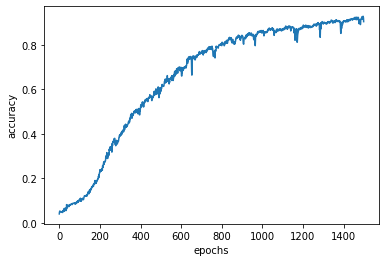

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## 텍스트 생성하기

### 다음 단어 예측하기

In [11]:
seed_text = "in the town of athy"

In [12]:
token_list = tokenizer.texts_to_sequences([seed_text])[0]

In [13]:
token_list = pad_sequences([token_list], 
                           maxlen=max_sequence_len-1, padding='pre')

In [14]:
predicted = np.argmax(model.predict(token_list), axis=-1)
print(predicted)

[68]


In [15]:
tokenizer.index_word[68]

'one'

### 예측을 연결하여 텍스트 생성하기

In [16]:
seed_text = "sweet jeremy saw dublin"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

sweet jeremy saw dublin acres of nonsensical jig gray for til man out out


## 데이터셋 확장

In [17]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt

--2022-03-19 07:05:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.66.80, 142.250.204.80, 172.217.31.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.66.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt.1’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0.1s    

2022-03-19 07:05:55 (513 KB/s) - ‘irish-lyrics-eof.txt.1’ saved [68970/68970]



In [18]:
data = open('irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

In [19]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [20]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [21]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, 
                           maxlen=max_sequence_len, padding='pre'))

In [22]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [23]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=1)

Epoch 1/1000
377/377 [==============================] - 5s 9ms/step - loss: 6.8786 - accuracy: 0.0652
Epoch 2/1000
377/377 [==============================] - 3s 9ms/step - loss: 6.3993 - accuracy: 0.0657
Epoch 3/1000
377/377 [==============================] - 3s 9ms/step - loss: 6.3070 - accuracy: 0.0657
Epoch 4/1000
377/377 [==============================] - 3s 9ms/step - loss: 6.2422 - accuracy: 0.0657
Epoch 5/1000
377/377 [==============================] - 3s 8ms/step - loss: 6.1856 - accuracy: 0.0657
Epoch 6/1000
377/377 [==============================] - 3s 9ms/step - loss: 6.1292 - accuracy: 0.0658
Epoch 7/1000
377/377 [==============================] - 3s 9ms/step - loss: 6.0722 - accuracy: 0.0681
Epoch 8/1000
377/377 [==============================] - 3s 8ms/step - loss: 6.0141 - accuracy: 0.0724
Epoch 9/1000
377/377 [==============================] - 3s 7ms/step - loss: 5.9565 - accuracy: 0.0735
Epoch 10/1000
377/377 [==============================] - 3s 7ms/step - loss: 5.901

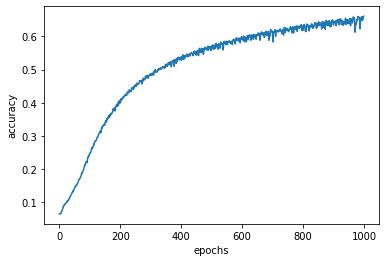

In [24]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [25]:
seed_text = "in the town of athy"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], 
                           maxlen=max_sequence_len-1, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=-1)
tokenizer.index_word[predicted[0]]

'one'

In [26]:
seed_text = "sweet jeremy saw dublin"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

sweet jeremy saw dublin next arrived and a stewards teasing daughter for the bower


## 모델 구조 바꾸기

In [27]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences='True')))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=1)

Epoch 1/1000
377/377 [==============================] - 10s 15ms/step - loss: 6.8625 - accuracy: 0.0556
Epoch 2/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.3870 - accuracy: 0.0657
Epoch 3/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.2845 - accuracy: 0.0657
Epoch 4/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.2083 - accuracy: 0.0671
Epoch 5/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.1345 - accuracy: 0.0703
Epoch 6/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.0696 - accuracy: 0.0731
Epoch 7/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.0061 - accuracy: 0.0766
Epoch 8/1000
377/377 [==============================] - 6s 15ms/step - loss: 5.9460 - accuracy: 0.0783
Epoch 9/1000
377/377 [==============================] - 6s 15ms/step - loss: 5.8961 - accuracy: 0.0795
Epoch 10/1000
377/377 [==============================] - 6s 15ms/step - 

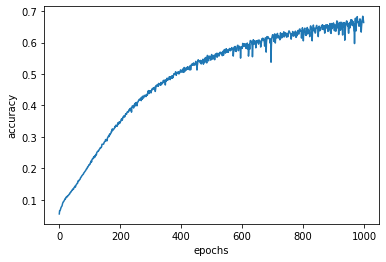

In [28]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [29]:
seed_text = "in the town of athy"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], 
                           maxlen=max_sequence_len-1, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=-1)
tokenizer.index_word[predicted[0]]

'one'

In [30]:
seed_text = "sweet jeremy saw dublin"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

sweet jeremy saw dublin valleys night with me seen shell down and clear left


## 데이터 개선하기

In [31]:
window_size = 10
sentences = []
alltext = []
data = open('irish-lyrics-eof.txt').read()
corpus = data.lower()
words = corpus.split(" ")
range_size = len(words)-window_size
for i in range(0, range_size):
    thissentence=""
    for word in range(0, window_size-1):
        word = words[i+word]
        thissentence = thissentence + word
        thissentence = thissentence + " "
    sentences.append(thissentence)

In [32]:
model = Sequential()
model.add(Embedding(total_words, 8))
model.add(Bidirectional(LSTM(window_size-1, return_sequences='True')))
model.add(Bidirectional(LSTM(window_size-1)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=1000, verbose=1)

Epoch 1/1000
377/377 [==============================] - 11s 15ms/step - loss: 6.9008 - accuracy: 0.0570
Epoch 2/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.4210 - accuracy: 0.0657
Epoch 3/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.3151 - accuracy: 0.0657
Epoch 4/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.2531 - accuracy: 0.0657
Epoch 5/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.2000 - accuracy: 0.0668
Epoch 6/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.1489 - accuracy: 0.0680
Epoch 7/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.1059 - accuracy: 0.0682
Epoch 8/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.0588 - accuracy: 0.0687
Epoch 9/1000
377/377 [==============================] - 6s 15ms/step - loss: 6.0139 - accuracy: 0.0699
Epoch 10/1000
377/377 [==============================] - 6s 15ms/step - 

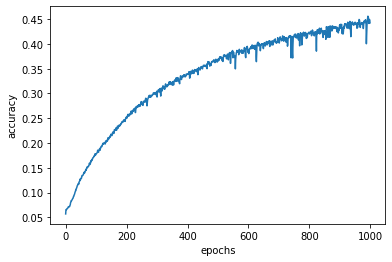

In [33]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [34]:
seed_text = "sweet jeremy saw dublin"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=window_size-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

sweet jeremy saw dublin mans keen shoes your fishin turning yearly of some salute


하이퍼파라미터 변경

In [35]:
window_size = 6
sentences = []
alltext = []
range_size = len(words)-window_size
for i in range(0, range_size):
    thissentence=""
    for word in range(0, window_size-1):
        word = words[i+word]
        thissentence = thissentence + word
        thissentence = thissentence + " "
    sentences.append(thissentence)

In [36]:
model = Sequential()
model.add(Embedding(total_words, 16))
model.add(Bidirectional(LSTM(32, return_sequences='True')))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, 
              metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100


/home/work/.local/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


377/377 [==============================] - 11s 16ms/step - loss: 6.7241 - accuracy: 0.0655
Epoch 2/100
377/377 [==============================] - 6s 17ms/step - loss: 6.2619 - accuracy: 0.0672
Epoch 3/100
377/377 [==============================] - 6s 16ms/step - loss: 6.0512 - accuracy: 0.0813
Epoch 4/100
377/377 [==============================] - 6s 16ms/step - loss: 5.8301 - accuracy: 0.0966
Epoch 5/100
377/377 [==============================] - 6s 16ms/step - loss: 5.6109 - accuracy: 0.1102
Epoch 6/100
377/377 [==============================] - 6s 16ms/step - loss: 5.4080 - accuracy: 0.1246
Epoch 7/100
377/377 [==============================] - 6s 17ms/step - loss: 5.2060 - accuracy: 0.1381
Epoch 8/100
377/377 [==============================] - 6s 16ms/step - loss: 5.0214 - accuracy: 0.1450
Epoch 9/100
377/377 [==============================] - 6s 17ms/step - loss: 4.8416 - accuracy: 0.1565
Epoch 10/100
377/377 [==============================] - 6s 16ms/step - loss: 4.6749 - accurac

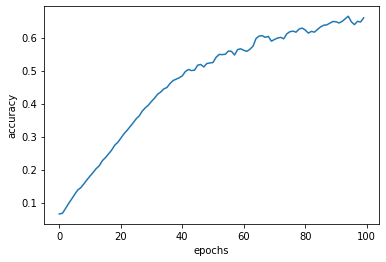

In [37]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [38]:
seed_text = "sweet jeremy saw dublin"
next_words=10
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list],  maxlen=window_size-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

sweet jeremy saw dublin du rum da gone by the boyne are gone of
